In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [1]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:04<00:00, 181MB/s]
100% 1.06G/1.06G [00:04<00:00, 235MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [7]:

train_ds = keras.utils.image_dataset_from_directory(
  directory='/content/train',
  labels='inferred',
  label_mode='int',
  batch_size=32,
  image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
  directory='/content/test',
  labels='inferred',
  label_mode='int',
  batch_size=32,
  image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label


  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)


In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 110ms/step - loss: 1.4181 - accuracy: 0.5918 - val_loss: 0.6132 - val_accuracy: 0.6558
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5561 - accuracy: 0.7168 - val_loss: 0.5151 - val_accuracy: 0.7670
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4579 - accuracy: 0.7855 - val_loss: 0.5434 - val_accuracy: 0.7220
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3932 - accuracy: 0.8199 - val_loss: 0.4298 - val_accuracy: 0.8050
Epoch 5/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3336 - accuracy: 0.8543 - val_loss: 0.4893 - val_accuracy: 0.7718
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2722 - accuracy: 0.8860 - val_loss: 0.5328 - val_accuracy: 0.7900
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.1769 - accuracy: 0.9288 - val_loss: 0.5183 - val_ac

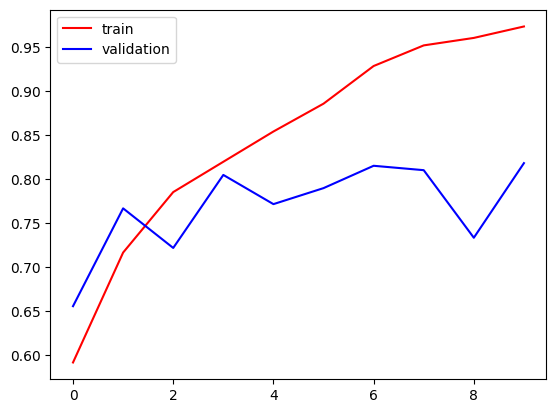

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

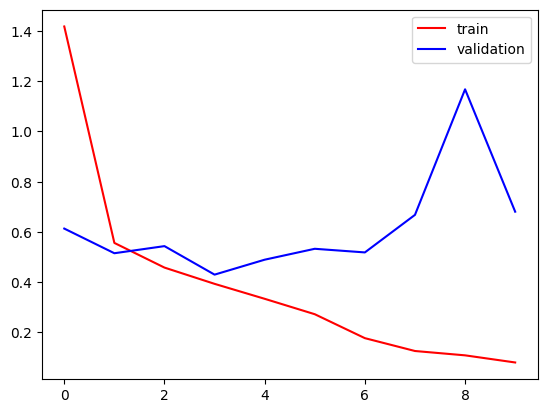

In [14]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [15]:
import cv2

In [31]:
test_image = cv2.imread('/content/train/cats/cat.10004.jpg')

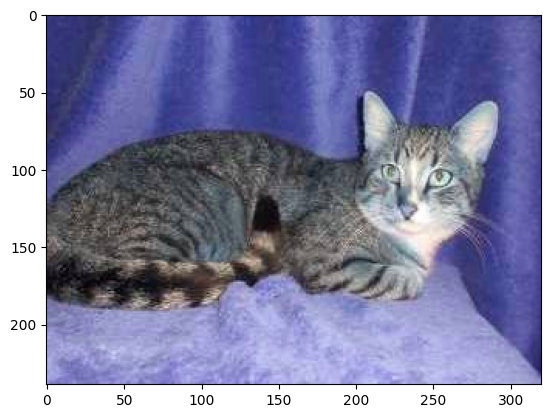

In [32]:
plt.imshow(test_image)

In [33]:
test_image.shape

(239, 320, 3)

In [34]:
test_image = cv2.resize(test_image, (256,256))

In [35]:
test_input = test_image.reshape((1,256,256,3))

In [36]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[3.909109e-06]], dtype=float32)

In [37]:
test_image = cv2.imread('/content/train/dogs/dog.1000.jpg')


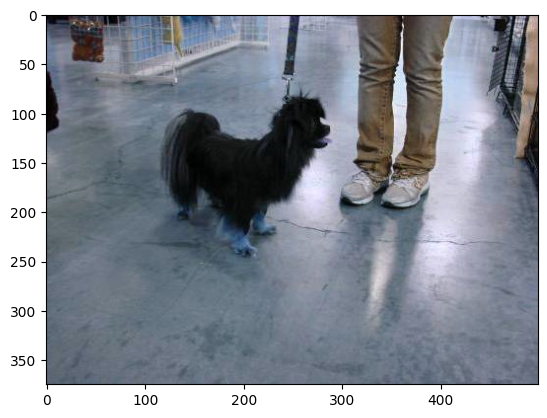

In [38]:
plt.imshow(test_image)

In [39]:
test_image.shape

(375, 499, 3)

In [40]:
test_image = cv2.resize(test_image, (256,256))

In [41]:
test_input = test_image.reshape((1,256,256,3))

In [42]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.938643]], dtype=float32)